In [1]:
# pipenv install scikit-learn scipy pandas matplotlib statsmodel fastapi uvicorn pydantic pingouin seaborn ipykernel

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Carga dos dados

In [3]:
# Abrir o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [4]:
# Checar estrutura do Dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
# Visualizar topo do dataframe
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [6]:
# Visualizar final do dataframe
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [7]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

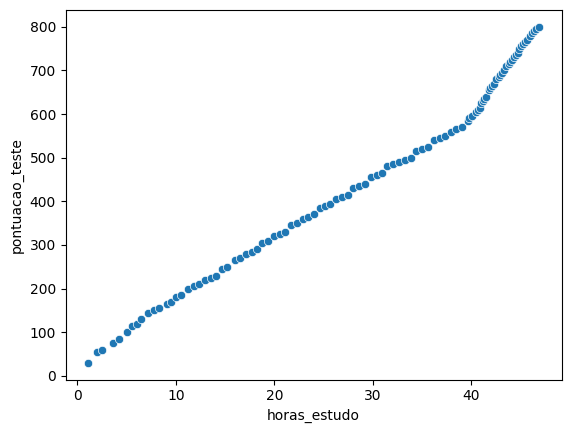

In [8]:
# Plot de Dispersão
# X = horas_estudo
# Y = pontuacao_teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='pontuacao_teste'>

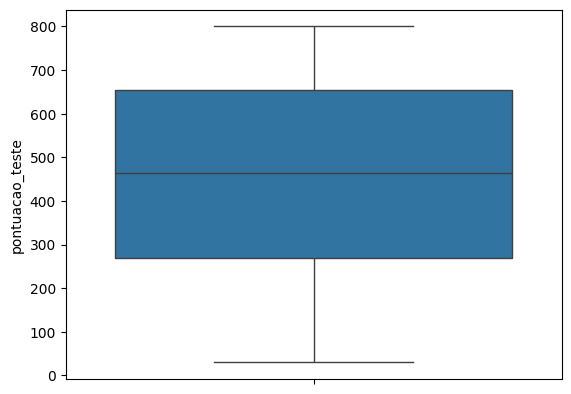

In [9]:
## Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(data=df_pontuacao,y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

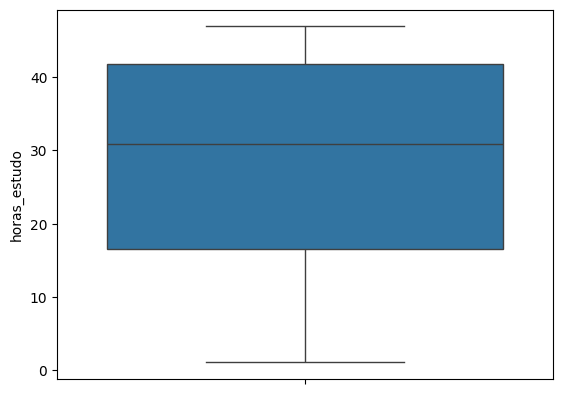

In [10]:
## Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(data=df_pontuacao,y='horas_estudo')

<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

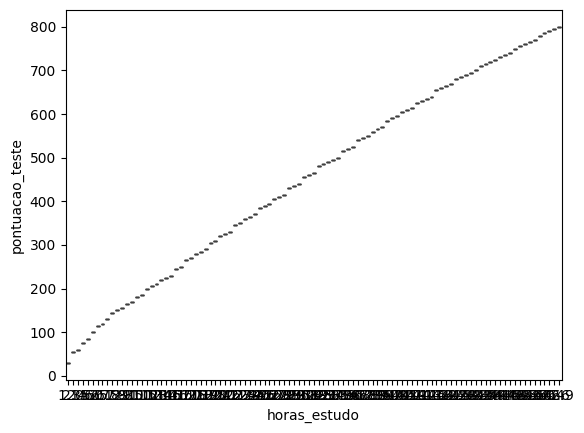

In [11]:
## Verificar se temos outliers
# Plot BoxPlot
sns.boxplot(data=df_pontuacao,y='pontuacao_teste', x='horas_estudo')

<Axes: >

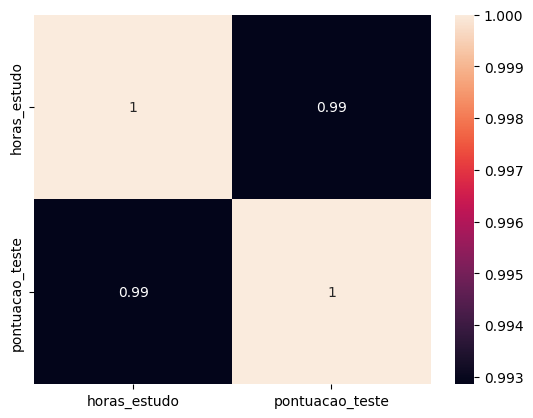

In [12]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

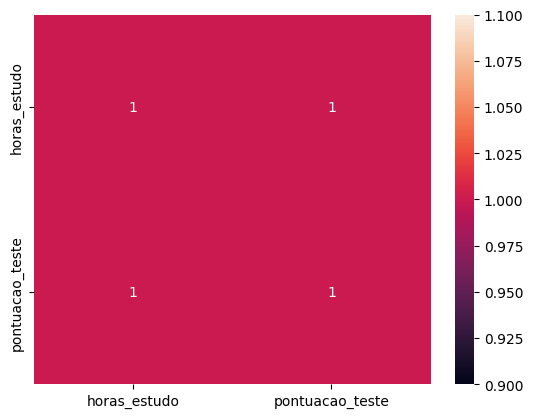

In [13]:
# Verificar Correlação - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

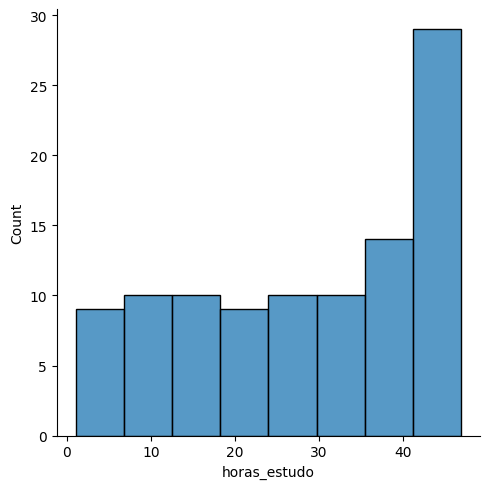

In [14]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='horas_estudo')

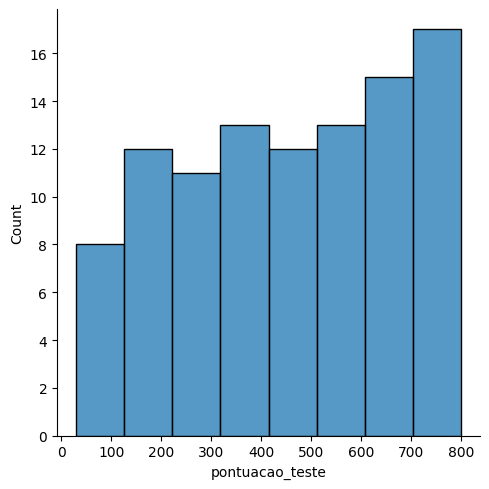

In [15]:
# Histograma das variáveis
sns.displot(df_pontuacao, x='pontuacao_teste')

## TREINAMENTO DO MODELO

In [16]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature (uma variável independendente),
# precisamos ajudar o shape

X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=50)

In [17]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [18]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Imprimir a equação da reta
# y - aX + b
print("A equação da reta é y= {:4f}x + {:4f}".format(reg_model.coef_[0][0],
                                                     reg_model.intercept_[0]))

A equação da reta é y= 15.642619x + 8.476601


### Validar Modelo - Métricas

In [20]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [21]:
# Comparar a predição com o valor real
# Calcular métrica R-Squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variável dependente que é
# explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [22]:
# Quanto uma coisa está influenciando na outra?
# Regressão linear sempre quer minimizar o erro
# Pega todos os erros, eleva ao quadrado e dps soma, visando minimizar o erro

# Calcular métria MAE(Mean Absolute Error)
# A diferença do valor predito e o valor de teste e tira uma média disso
# MAE = Media(y_test - y_pred)
# é uma métrica fácil de interpretar porque ela te dar um número de erro com 
# base numa escala conhecida que é a variável independente

# MAE é menos sensível a outliers
mean_absolute_error(y_test,y_pred)

22.957470277134615

In [23]:
# Calcular métrica MSE (Mean Squared Error)
# MSE = Média (y_test - y_pred)2
# Não é uma métrica fácil de interpretar
# MSE é mais sensível a outiliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

766.9972992416427

In [24]:
# Calcular métrica RrMSE (Square Root Mean Squared Error)
# MSE = Raiz {Média (y_test - y_pred)2}
# é uma métrica fácil de interpretar
# MSE é mais sensível a outiliers 
# penaliza grandes erros mas tira uma raiz quadrada.

from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

27.69471608884342

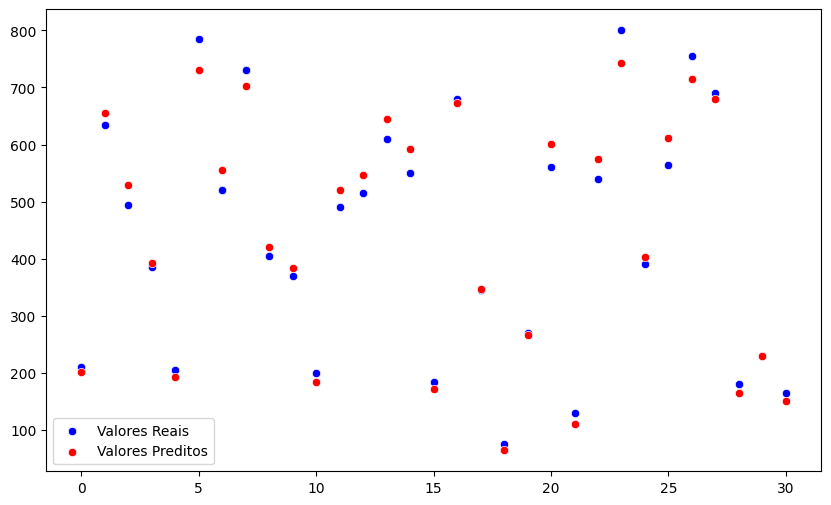

In [25]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))

sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', 
                label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', 
                label='Valores Preditos')
plt.legend()
plt.show()

### Análise dos resíduos

In [27]:
# Calcular residuos
residuos = y_test - y_pred

In [28]:
# Calcular os resíduos padronizados (standarization)
# Para cada elemento de um conjunto (x - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

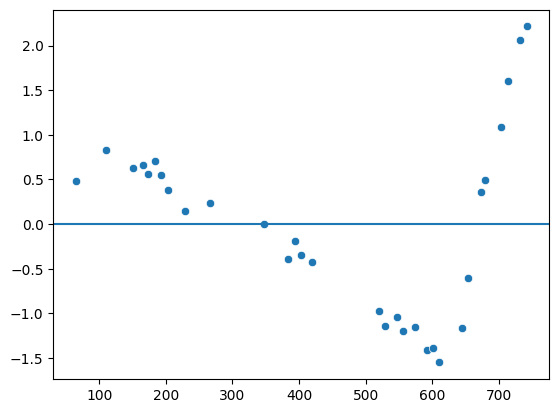

In [29]:
# Verficaar Linearidade
# Se os residuos estiverem entre -2 e + 2, na escala padrão
# indica linearidade dos resíduos

# Verificar a homogeneidade das variâncias dos resíduos (Homocedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade, caso contrário
# Se tivermos alguma tendência ou padrão nos dados (formam um cone, funil)
# Nesse caso há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

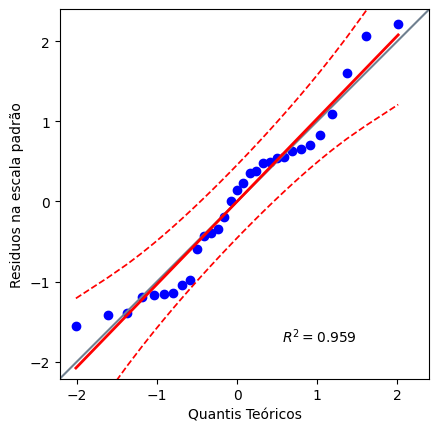

In [30]:
# Verificar normalidade dos resíduos
# QQ (Quantile-Quantile) Plot, que avalisa se uma amostra segue uma
# distribuição normal
# banda de segurança, não pode está muito proximo ao grafico de segurança
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos') # onde os dados deveriam estar
plt.ylabel('Residuos na escala padrão')
plt.show()

In [ ]:
# Teste de normalidade - Shairo-Wilk
# se for h0 - Segue distribuição normal
# se for h1 - Não segue distribuição normal
# Se o p-valor > 0.05 a gente não rejeita o H0, caso contrário, reijeitamos

stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-Valor: {}"
.format(stat_shapiro,p_valor_shapiro))

Estatística do teste: 0.9500532226161759 e P-Valor: 0.15663817850304967


In [32]:
# Teste de normalidade - Kolmogorov-Smirnov
# se for h0 - Segue distribuição normal
# se for h1 - Não segue distribuição normal
# Se o p-valor > 0.05 a gente não rejeita o H0, caso contrário, reijeitamos

stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e P-Valor: {}"
.format(stat_ks,p_valor_ks))

Estatística do teste: 0.48355808450512827 e P-Valor: 3.395368995814077e-07


In [33]:
# o modelo consegiu prever bem ? sim, dentro desse universo de informação apenas
# analisando os erros, podemos concluir que não parece ter muitos
# mas é necessário validar com o especalista do domínio do problema

# é possível obter mais dados? Talvez tendo mais dados, poderiamos ter
#  conclusões melhores



### Fazer predições com o modelo

In [34]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo ?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [36]:
# Considerando o modelo, quantas horas estudar para obter 600 pontos ?
# y = ax + b
# qual é esse x ? 
# y - b = ax
# x = (y - b) / a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

## Salvar modelo para usar depois

In [38]:
import joblib
joblib.dump(reg_model, './models/modelo_regressao.pkl')

['./models/modelo_regressao.pkl']